<a href="https://colab.research.google.com/github/YoshiyukiKono/Aiven_Kafka_Quickstart_with_Python/blob/main/practice20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dotData Data Science Callenge - Interview Task2: Skill Accessment


## Preparation

Put all the data files to the current directory.

### Taxi files
Create pandas dataframe from the csv files that has the format of 'yyyy-mm-dd_100k.csv' rocated in the current directory.

In [208]:
import pandas as pd
import glob

# Get a list of all CSV files matching the pattern
csv_files = glob.glob('????-??_100k.csv')

# Create an empty list to store dataframes
dfs = []

# Loop through the CSV files and read them into dataframes
for file in csv_files:
    file_df = pd.read_csv(file)
    dfs.append(file_df)

df = pd.concat(dfs, ignore_index=True)

print(df)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

Confirm the sahpe of the dataframe

In [209]:
print(df.shape)

(1200000, 25)


Inspect the columns typing and check for potentially missing values

In [210]:

print(pd.DataFrame({"type":df.dtypes, "nan count":df.isna().sum()}))

                          type  nan count
VendorID                 int64          0
pickup_datetime         object          0
dropoff_datetime        object          0
passenger_count          int64          0
trip_distance          float64          0
pickup_longitude       float64          0
pickup_latitude        float64          0
RateCodeID               int64          0
store_and_fwd_flag      object          0
dropoff_longitude      float64          0
dropoff_latitude       float64          0
payment_type             int64          0
fare_amount            float64          0
extra                  float64          0
mta_tax                float64          0
tip_amount             float64          0
tolls_amount           float64          0
improvement_surcharge  float64          0
total_amount           float64          0
pickup_zip               int64          0
pickup_borough          object          0
pickup_neighborhood     object          0
dropoff_zip              int64    

#### Tip Rate

Add a column about tip rate to the data frame

In [252]:
df['tip_rate'] = df['tip_amount'] / df['fare_amount']
print(df)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

### Holiday

Read "holidays.csv", whose separator is `;`.

In [211]:
holidays_df = pd.read_csv('holidays.csv', sep=';')
print(holidays_df)

        Date                      Holiday
0   01.01.15                New Years Day
1   19.01.15   Martin Luther King Jr. Day
2   12.02.15           Lincoln's Birthday
3   16.02.15              Presidents' Day
4   10.05.15                 Mother's Day
5   25.05.15                 Memorial Day
6   21.06.15                 Father's Day
7   03.07.15  Independence Day (observed)
8   07.09.15                    Labor Day
9   12.10.15                 Columbus Day
10  11.11.15                 Veterans Day
11  26.11.15                 Thanksgiving
12  27.11.15       Day after Thanksgiving
13  25.12.15                Christmas Day


Create a set of holiday dates

In [212]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date']).dt.date

holiday_dates = set(holidays_df['Date'])

holiday_dates

{datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 19),
 datetime.date(2015, 2, 16),
 datetime.date(2015, 3, 7),
 datetime.date(2015, 5, 25),
 datetime.date(2015, 6, 21),
 datetime.date(2015, 7, 9),
 datetime.date(2015, 10, 5),
 datetime.date(2015, 11, 11),
 datetime.date(2015, 11, 26),
 datetime.date(2015, 11, 27),
 datetime.date(2015, 12, 2),
 datetime.date(2015, 12, 10),
 datetime.date(2015, 12, 25)}

Convert `pickup_datetime` to date

In [213]:
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date

print(df)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

Add a new column named `holiday_binary` to the data frame, which is 1 when it is a holiday, and 0 otherwise.

In [214]:
df['holiday_binary'] = df['pickup_date'].apply(lambda date: 1 if date in holiday_dates else 0)

print(df)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

Check the result.

In [215]:
# Filter the DataFrame for holiday_binary == 1
holiday_records = df[df['holiday_binary'] == 1][['pickup_date', 'holiday_binary']]

# Apply the unique function to the 'pickup_date' column
unique_holiday_dates = holiday_records['pickup_date'].unique()

print(unique_holiday_dates)

[datetime.date(2015, 5, 25) datetime.date(2015, 12, 2)
 datetime.date(2015, 12, 10) datetime.date(2015, 12, 25)
 datetime.date(2015, 10, 5) datetime.date(2015, 3, 7)
 datetime.date(2015, 1, 19) datetime.date(2015, 1, 1)
 datetime.date(2015, 11, 27) datetime.date(2015, 11, 26)
 datetime.date(2015, 11, 11) datetime.date(2015, 2, 16)
 datetime.date(2015, 7, 9) datetime.date(2015, 6, 21)]


## Weather

Read 2015_weather.csv, whose separator is ";".

In [216]:
weather_df = pd.read_csv('2015_weather.csv', sep=';')

print(weather_df)

    pickup_date  avg_temp_C  Rain  Fog  Snow
0      01.01.15           1   NaN  NaN   NaN
1      02.01.15           4   NaN  NaN   NaN
2      03.01.15           3   1.0  NaN   1.0
3      04.01.15           9   1.0  NaN   NaN
4      05.01.15           2   NaN  NaN   NaN
..          ...         ...   ...  ...   ...
360    27.12.15          12   1.0  NaN   NaN
361    28.12.15           4   1.0  NaN   NaN
362    29.12.15           4   1.0  NaN   NaN
363    30.12.15           6   1.0  NaN   NaN
364    31.12.15           7   1.0  NaN   NaN

[365 rows x 5 columns]


In [217]:
print(pd.DataFrame({"type":weather_df.dtypes, "nan count":weather_df.isna().sum()}))

                type  nan count
pickup_date   object          0
avg_temp_C     int64          0
Rain         float64        268
Fog          float64        344
Snow         float64        340


Convert all NaN values of to 0 and convert float values  to int

In [218]:
weather_df = weather_df.fillna(0)
print(weather_df)

# Select columns with float values
float_columns = weather_df.select_dtypes(include=['float']).columns

# Convert float values to integers
weather_df[float_columns] = weather_df[float_columns].astype(int)

print(weather_df)

    pickup_date  avg_temp_C  Rain  Fog  Snow
0      01.01.15           1   0.0  0.0   0.0
1      02.01.15           4   0.0  0.0   0.0
2      03.01.15           3   1.0  0.0   1.0
3      04.01.15           9   1.0  0.0   0.0
4      05.01.15           2   0.0  0.0   0.0
..          ...         ...   ...  ...   ...
360    27.12.15          12   1.0  0.0   0.0
361    28.12.15           4   1.0  0.0   0.0
362    29.12.15           4   1.0  0.0   0.0
363    30.12.15           6   1.0  0.0   0.0
364    31.12.15           7   1.0  0.0   0.0

[365 rows x 5 columns]
    pickup_date  avg_temp_C  Rain  Fog  Snow
0      01.01.15           1     0    0     0
1      02.01.15           4     0    0     0
2      03.01.15           3     1    0     1
3      04.01.15           9     1    0     0
4      05.01.15           2     0    0     0
..          ...         ...   ...  ...   ...
360    27.12.15          12     1    0     0
361    28.12.15           4     1    0     0
362    29.12.15           4    

In [219]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pickup_date  365 non-null    object
 1   avg_temp_C   365 non-null    int64 
 2   Rain         365 non-null    int64 
 3   Fog          365 non-null    int64 
 4   Snow         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


Convert `pickup_date` in weather_df to date object

In [220]:
weather_df['pickup_date'] = pd.to_datetime(weather_df['pickup_date'], format='%d.%m.%y').dt.date

Merge the two dataframes based on the `pickup_date`  columns

In [221]:
df = pd.merge(df, weather_df, left_on='pickup_date', right_on='pickup_date', how='left')

print(df)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

## Explanatory Data Analysis

In [222]:
df.shape

(1200000, 31)

In [223]:
df.isnull().sum()

,0
VendorID,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RateCodeID,0
store_and_fwd_flag,0
dropoff_longitude,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1200000 non-null  int64  
 1   pickup_datetime        1200000 non-null  object 
 2   dropoff_datetime       1200000 non-null  object 
 3   passenger_count        1200000 non-null  int64  
 4   trip_distance          1200000 non-null  float64
 5   pickup_longitude       1200000 non-null  float64
 6   pickup_latitude        1200000 non-null  float64
 7   RateCodeID             1200000 non-null  int64  
 8   store_and_fwd_flag     1200000 non-null  object 
 9   dropoff_longitude      1200000 non-null  float64
 10  dropoff_latitude       1200000 non-null  float64
 11  payment_type           1200000 non-null  int64  
 12  fare_amount            1200000 non-null  float64
 13  extra                  1200000 non-null  float64
 14  mta_tax           

In [225]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,1200000.0,1.528088,0.499211,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1200000.0,1.684683,1.338642,0.000000,1.000000,1.000000,2.000000,7.000000e+00
trip_distance,1200000.0,12.359002,10771.875607,0.000000,1.000000,1.700000,2.960000,1.180000e+07
pickup_longitude,1200000.0,-73.978092,0.025266,-74.114113,-73.992325,-73.982246,-73.969177,-7.370655e+01
pickup_latitude,1200000.0,40.753129,0.023093,40.576962,40.738617,40.754608,40.768425,4.090692e+01
RateCodeID,1200000.0,1.003112,0.292960,1.000000,1.000000,1.000000,1.000000,9.900000e+01
dropoff_longitude,1200000.0,-73.975728,0.027199,-74.238556,-73.991570,-73.980537,-73.965111,-7.369890e+01
dropoff_latitude,1200000.0,40.753034,0.029026,40.514538,40.737320,40.754848,40.769558,4.091180e+01
payment_type,1200000.0,1.374073,0.493683,1.000000,1.000000,1.000000,2.000000,4.000000e+00
fare_amount,1200000.0,11.584283,7.652375,0.010000,6.500000,9.500000,14.000000,8.000000e+02


## Convertion to features



In [226]:
!pip install feature_engine

### Real-world dates to features

In [227]:
from feature_engine.datetime import DatetimeFeatures
dt_features = DatetimeFeatures(
    variables="pickup_datetime",
    features_to_extract="all",
    drop_original=False
)

In [228]:
dt_features.fit(df)
df_transf = dt_features.transform(df)
print(df_transf)

         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

In [229]:
print(pd.DataFrame({"type":df_transf.dtypes, "nan count":df_transf.isna().sum()}))

                                  type  nan count
VendorID                         int64          0
pickup_datetime                 object          0
dropoff_datetime                object          0
passenger_count                  int64          0
trip_distance                  float64          0
pickup_longitude               float64          0
pickup_latitude                float64          0
RateCodeID                       int64          0
store_and_fwd_flag              object          0
dropoff_longitude              float64          0
dropoff_latitude               float64          0
payment_type                     int64          0
fare_amount                    float64          0
extra                          float64          0
mta_tax                        float64          0
tip_amount                     float64          0
tolls_amount                   float64          0
improvement_surcharge          float64          0
total_amount                   float64          0


Since this data consists only of data from 2015, features related to the concept of year are not used.

In [230]:
df_transf = df_transf.drop(['pickup_datetime_year', 'pickup_datetime_leap_year'], axis=1)

Do not use too detailed information about time.

In [231]:
df_transf = df_transf.drop(['pickup_datetime_minute', 'pickup_datetime_second'], axis=1)

### Ride Time

Add ride_time columns to df_transf by using pickup_datetime and dropoff_datetime


In [232]:

df_transf['ride_time'] = (pd.to_datetime(df_transf['dropoff_datetime']) - pd.to_datetime(df_transf['pickup_datetime'])).dt.total_seconds()

print(df_transf)


         VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0               2  2015-05-27 17:31:42  2015-05-27 17:50:45                5   
1               2  2015-05-23 02:14:01  2015-05-23 02:23:53                6   
2               1  2015-05-09 10:11:50  2015-05-09 10:18:43                2   
3               2  2015-05-05 16:25:21  2015-05-05 16:36:25                3   
4               2  2015-05-07 19:26:55  2015-05-07 19:42:19                6   
...           ...                  ...                  ...              ...   
1199995         2  2015-08-21 22:21:42  2015-08-21 22:34:20                3   
1199996         2  2015-08-20 08:15:28  2015-08-20 08:24:49                4   
1199997         2  2015-08-20 02:25:23  2015-08-20 02:31:22                1   
1199998         2  2015-08-23 13:31:15  2015-08-23 13:42:50                1   
1199999         2  2015-08-25 07:33:19  2015-08-25 07:42:19                1   

         trip_distance  pickup_longitud

Remove real-time datetime

In [233]:
df_transf = df_transf.drop(['pickup_datetime', 'dropoff_datetime','pickup_date'], axis=1)

In [234]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   VendorID                       1200000 non-null  int64  
 1   passenger_count                1200000 non-null  int64  
 2   trip_distance                  1200000 non-null  float64
 3   pickup_longitude               1200000 non-null  float64
 4   pickup_latitude                1200000 non-null  float64
 5   RateCodeID                     1200000 non-null  int64  
 6   store_and_fwd_flag             1200000 non-null  object 
 7   dropoff_longitude              1200000 non-null  float64
 8   dropoff_latitude               1200000 non-null  float64
 9   payment_type                   1200000 non-null  int64  
 10  fare_amount                    1200000 non-null  float64
 11  extra                          1200000 non-null  float64
 12  mta_tax       

### Geographic Data

Latitude and longitude are inappropriate for road traffic information, so they are deleted.

In [235]:
df_transf = df_transf.drop(['pickup_longitude', 'pickup_latitude',
                            'dropoff_longitude', 'dropoff_latitude'], axis=1)

<Axes: >

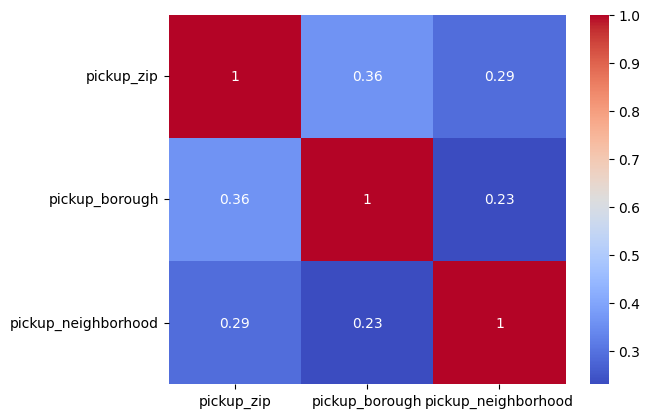

In [237]:
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

pickup_cols = ['pickup_zip','pickup_borough', 'pickup_neighborhood']
pickup_cols_encode = ['pickup_borough', 'pickup_neighborhood']

encoder = OrdinalEncoder()
df_transf[pickup_cols_encode] = encoder.fit_transform(df_transf[pickup_cols_encode])

# 相関行列を作成
correlation_matrix = df_transf[pickup_cols].corr()

# ヒートマップで可視化
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<Axes: >

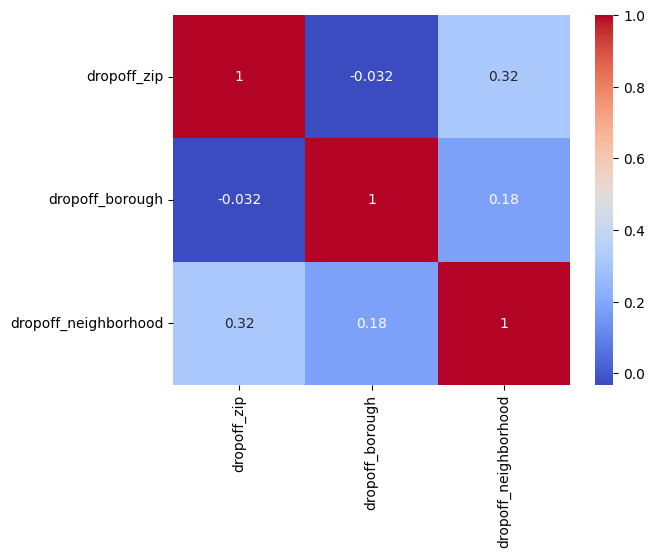

In [239]:
dropoff_cols = ['dropoff_zip','dropoff_borough', 'dropoff_neighborhood']
dropoff_cols_encode = ['dropoff_borough', 'dropoff_neighborhood']

encoder = OrdinalEncoder()
df_transf[dropoff_cols] = encoder.fit_transform(df_transf[dropoff_cols])

# 相関行列を作成
correlation_matrix = df_transf[dropoff_cols].corr()

# ヒートマップで可視化
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


The correlation is not too strong, so we will use all of them.



In [181]:
df_transf['pickup_zip'] = df_transf['pickup_zip'].astype('category')
df_transf['dropoff_zip'] = df_transf['dropoff_zip'].astype('category')
df_transf['pickup_borough'] = df_transf['pickup_borough'].astype('category')
df_transf['pickup_neighborhood'] = df_transf['pickup_neighborhood'].astype('category')
df_transf['dropoff_borough'] = df_transf['dropoff_borough'].astype('category')
df_transf['dropoff_neighborhood'] = df_transf['dropoff_neighborhood'].astype('category')

In [182]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 41 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   VendorID                       1200000 non-null  int64   
 1   passenger_count                1200000 non-null  int64   
 2   trip_distance                  1200000 non-null  float64 
 3   RateCodeID                     1200000 non-null  int64   
 4   store_and_fwd_flag             1200000 non-null  object  
 5   payment_type                   1200000 non-null  int64   
 6   fare_amount                    1200000 non-null  float64 
 7   extra                          1200000 non-null  float64 
 8   mta_tax                        1200000 non-null  float64 
 9   tip_amount                     1200000 non-null  float64 
 10  tolls_amount                   1200000 non-null  float64 
 11  improvement_surcharge          1200000 non-null  float64 
 12  

### Misc.

####  Technical detail not relevant to tip rate.
 - store_and_fwd_flag

#### Amount information correlated with other data such as fare, time, or location, or set as a flat rate
 - extra
 - mta_tax
 - tolls_amount
 - improvement_surcharge
 - total_amount


In [183]:
df_transf = df_transf.drop(['store_and_fwd_flag',
              'extra', 'mta_tax', 'tolls_amount',
              'improvement_surcharge', 'total_amount'], axis=1)

In [184]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 35 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   VendorID                       1200000 non-null  int64   
 1   passenger_count                1200000 non-null  int64   
 2   trip_distance                  1200000 non-null  float64 
 3   RateCodeID                     1200000 non-null  int64   
 4   payment_type                   1200000 non-null  int64   
 5   fare_amount                    1200000 non-null  float64 
 6   tip_amount                     1200000 non-null  float64 
 7   pickup_zip                     1200000 non-null  category
 8   pickup_borough                 1200000 non-null  category
 9   pickup_neighborhood            1200000 non-null  category
 10  dropoff_zip                    1200000 non-null  category
 11  dropoff_borough                1200000 non-null  category
 12  

### Type Information


Information that indicates types such as `VendorID`, `RateCodeID`, and `payment_type` is likely to be biased in the sample data, so check it.

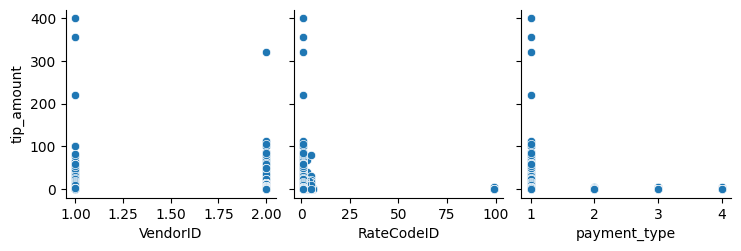

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, x_vars=['VendorID', 'RateCodeID', 'payment_type'], y_vars=['tip_amount'], kind='scatter')
plt.show()

`RateCodeID` and `payment_type` will be deleted because the sample data is biased.

In [186]:
df_transf = df_transf.drop(['RateCodeID', 'payment_type'], axis=1)

In [187]:
df_transf['VendorID'] = df_transf['VendorID'].astype('category')

In [188]:
unique_counts = df_transf.nunique()
print(unique_counts)

VendorID                            2
passenger_count                     8
trip_distance                    2179
fare_amount                       327
tip_amount                       1507
pickup_zip                        163
pickup_borough                      5
pickup_neighborhood                40
dropoff_zip                       177
dropoff_borough                     5
dropoff_neighborhood               42
holiday_binary                      2
avg_temp_C                         44
Rain                                2
Fog                                 2
Snow                                2
pickup_datetime_month              12
pickup_datetime_quarter             4
pickup_datetime_semester            2
pickup_datetime_week               53
pickup_datetime_day_of_week         7
pickup_datetime_day_of_month       31
pickup_datetime_day_of_year       365
pickup_datetime_weekend             2
pickup_datetime_month_start         2
pickup_datetime_month_end           2
pickup_datet

## Response variable



In [191]:
dft = df_transf.copy()

Add a binary value column, which is 1 when `tip_rate` is more than 0.2, and 0 otherwise to the data frame

In [193]:
dft['tip_rate_binary'] = dft['tip_rate'].apply(lambda x: 1 if x > 0.2 else 0)
dft

,VendorID,passenger_count,trip_distance,fare_amount,tip_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,...,pickup_datetime_month_end,pickup_datetime_quarter_start,pickup_datetime_quarter_end,pickup_datetime_year_start,pickup_datetime_year_end,pickup_datetime_days_in_month,pickup_datetime_hour,ride_time,tip_rate,tip_rate_binary
0,2,5,2.82,14.0,0.00,41.0,2.0,36.0,21.0,2.0,...,0,0,0,0,0,31,17,1143.0,0.000000,0
1,2,6,2.73,10.0,1.70,2.0,2.0,20.0,19.0,2.0,...,0,0,0,0,0,31,2,592.0,0.170000,0
2,1,2,1.40,7.0,1.20,19.0,2.0,12.0,13.0,2.0,...,0,0,0,0,0,31,10,413.0,0.171429,0
3,2,3,1.51,8.5,2.06,16.0,2.0,8.0,13.0,2.0,...,0,0,0,0,0,31,16,664.0,0.242353,1
4,2,6,3.90,14.0,0.00,10.0,2.0,14.0,25.0,2.0,...,0,0,0,0,0,31,19,924.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,2,3,2.27,10.5,2.36,8.0,2.0,12.0,33.0,2.0,...,0,0,0,0,0,31,22,758.0,0.224762,1
1199996,2,4,1.05,8.0,0.00,15.0,2.0,8.0,15.0,2.0,...,0,0,0,0,0,31,8,561.0,0.000000,0
1199997,2,1,1.26,6.5,0.00,12.0,2.0,14.0,11.0,2.0,...,0,0,0,0,0,31,2,359.0,0.000000,0
1199998,2,1,1.54,9.0,0.00,15.0,2.0,8.0,0.0,2.0,...,0,0,0,0,0,31,13,695.0,0.000000,0


In [194]:
print(dft.shape)
dft.head()

(1200000, 35)


,VendorID,passenger_count,trip_distance,fare_amount,tip_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,...,pickup_datetime_month_end,pickup_datetime_quarter_start,pickup_datetime_quarter_end,pickup_datetime_year_start,pickup_datetime_year_end,pickup_datetime_days_in_month,pickup_datetime_hour,ride_time,tip_rate,tip_rate_binary
0,2,5,2.82,14.0,0.00,41.0,2.0,36.0,21.0,2.0,...,0,0,0,0,0,31,17,1143.0,0.000000,0
1,2,6,2.73,10.0,1.70,2.0,2.0,20.0,19.0,2.0,...,0,0,0,0,0,31,2,592.0,0.170000,0
2,1,2,1.40,7.0,1.20,19.0,2.0,12.0,13.0,2.0,...,0,0,0,0,0,31,10,413.0,0.171429,0
3,2,3,1.51,8.5,2.06,16.0,2.0,8.0,13.0,2.0,...,0,0,0,0,0,31,16,664.0,0.242353,1
4,2,6,3.90,14.0,0.00,10.0,2.0,14.0,25.0,2.0,...,0,0,0,0,0,31,19,924.0,0.000000,0


## Classification


In [101]:
X = dft.drop(['tip_rate_binary','tip_rate','tip_amount'], axis=1)
y = dft['tip_rate_binary']

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib
import sklearn
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_train:', X_train.shape, ' y_train:', y_train.shape, ' X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (960000, 32)  y_train: (960000,)  X_test: (240000, 32)  y_test: (240000,)


Split a part of the training data into validation data

In [104]:

X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=0)
print('X_tr:', X_tr.shape, ' y_tr:', y_tr.shape, ' X_va:', X_va.shape, ' y_vaの形状:', y_va.shape)

X_tr: (768000, 32)  y_tr: (768000,)  X_va: (192000, 32)  y_vaの形状: (192000,)


## LightGBM

In [105]:
# ハイパーパラメータの設定
import lightgbm as lgb

lgb_train = lgb.Dataset(X_tr, y_tr)
lgb_eval = lgb.Dataset(X_va, y_va, reference=lgb_train)

params = {
    'objective': 'binary',
    'num_leaves': 5,
    'seed': 0,
    'verbose': -1,
}

# 誤差プロットの格納用データ
evals_result = {}

In [106]:
# モデルの学習
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=500,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.early_stopping(10),
                             lgb.log_evaluation(100),
                             lgb.record_evaluation(evals_result)])

Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.672044	valid's binary_logloss: 0.673327
[200]	train's binary_logloss: 0.669777	valid's binary_logloss: 0.671807
[300]	train's binary_logloss: 0.668517	valid's binary_logloss: 0.671292
[400]	train's binary_logloss: 0.667558	valid's binary_logloss: 0.671016
Early stopping, best iteration is:
[458]	train's binary_logloss: 0.66703	valid's binary_logloss: 0.670879


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

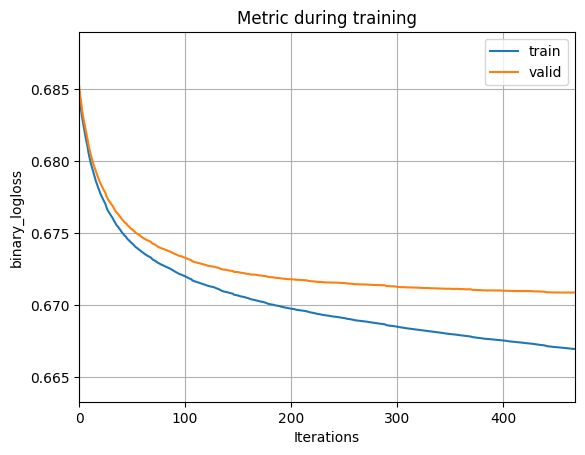

In [107]:
lgb.plot_metric(evals_result)

In [108]:
model.best_iteration

458

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# 検証データの予測と評価
y_va_pred_proba = model.predict(X_va, num_iteration=model.best_iteration) # ラベル1の確率
print('ラベル1の確率：', y_va_pred_proba)
y_va_pred = np.round(y_va_pred_proba) # 確率をラベル0 or 1に変換
print('予測ラベル値：', y_va_pred)

ac_score = accuracy_score(y_va, y_va_pred)
print('accuracy = %.2f' % (ac_score))

f1 = f1_score(y_va, y_va_pred)
print('F1-score = %.2f' % (f1))

ラベル1の確率： [0.51281538 0.41335923 0.54721272 ... 0.44310144 0.37674601 0.57269174]
予測ラベル値： [1. 0. 1. ... 0. 0. 1.]
accuracy = 0.58
F1-score = 0.34


In [113]:
# テストデータの予測と評価
y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration) # ラベル1の確率
print('ラベル1の確率：', y_test_pred_proba)
y_test_pred = np.round(y_test_pred_proba) # 確率をラベル0 or 1に変換
print('予測ラベル値：', y_test_pred)

ac_score = accuracy_score(y_test, y_test_pred)
print('accuracy = %.2f' % (ac_score))

f1 = f1_score(y_test, y_test_pred)
print('F1-score = %.2f' % (f1))

ラベル1の確率： [0.43682166 0.537032   0.5004067  ... 0.4676601  0.46347053 0.36779146]
予測ラベル値： [0. 1. 1. ... 0. 0. 0.]
accuracy = 0.58
F1-score = 0.33


Text(45.722222222222214, 0.5, 'label')

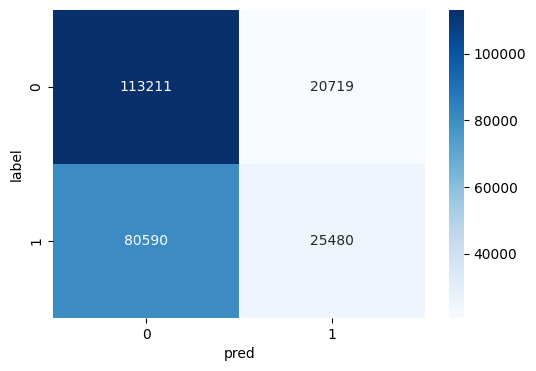

In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

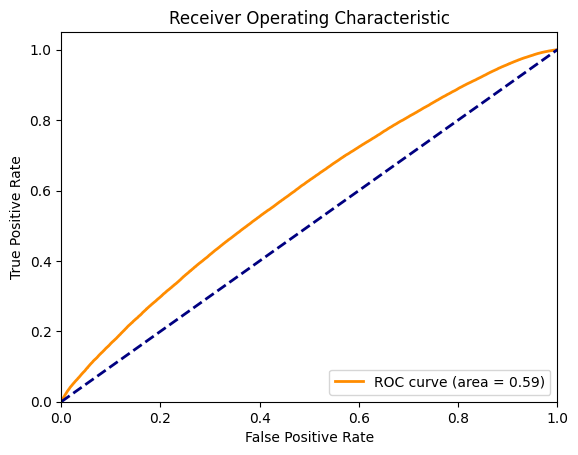

AUC: 0.5935342124585484


In [127]:
# prompt: ROCとAUCの分析結果を表示してください

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# テストデータの予測確率
y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC曲線の描画
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC:', roc_auc)


Visualize feature importance

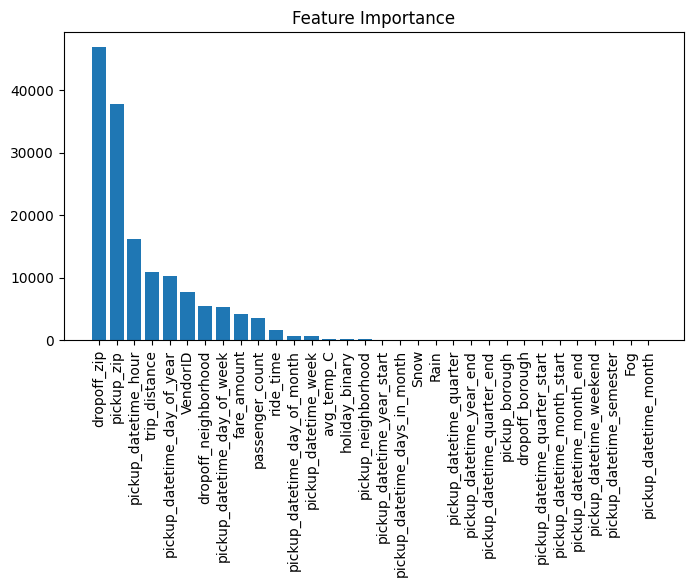

In [115]:
# 特徴量重要度の可視化
importances = model.feature_importance(importance_type='gain') # 特徴量重要度
indices = np.argsort(importances)[::-1] # 特徴量重要度を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title("Feature Importance") # プロットのタイトルを作成
plt.bar(range(len(indices)), importances[indices]) # 棒グラフを追加
plt.xticks(range(len(indices)), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示

### SHAP

In [120]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.4 MB/s eta 0:00:00


In [121]:
import shap
shap.__version__

'0.46.0'

In [122]:
import shap
explainer = shap.TreeExplainer(
    model = model,
    feature_perturbation = 'tree_path_dependent')

Calculate SHAP Value

In [123]:
shap_values = explainer(X_test)

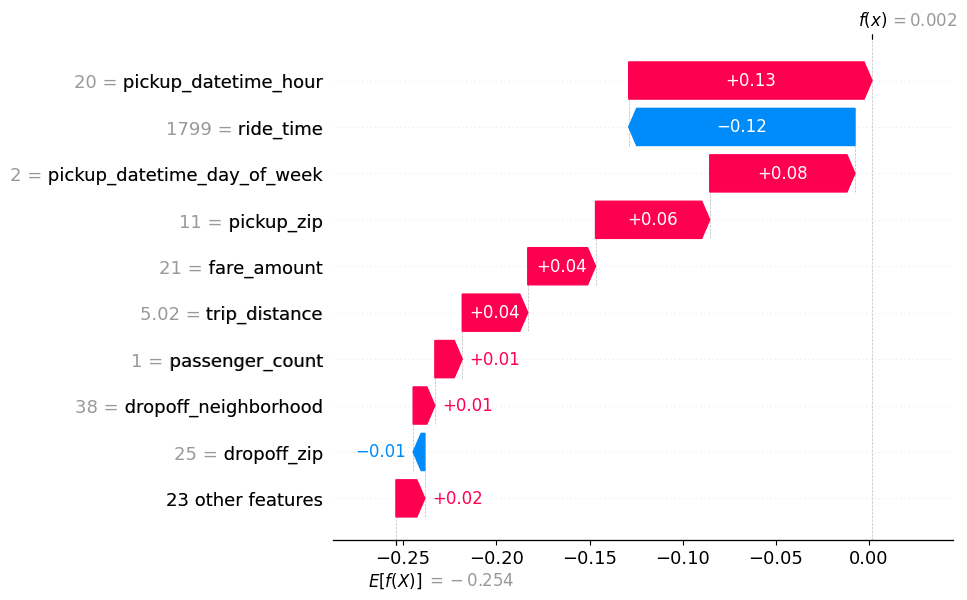

In [124]:
shap.plots.waterfall(shap_values[2])

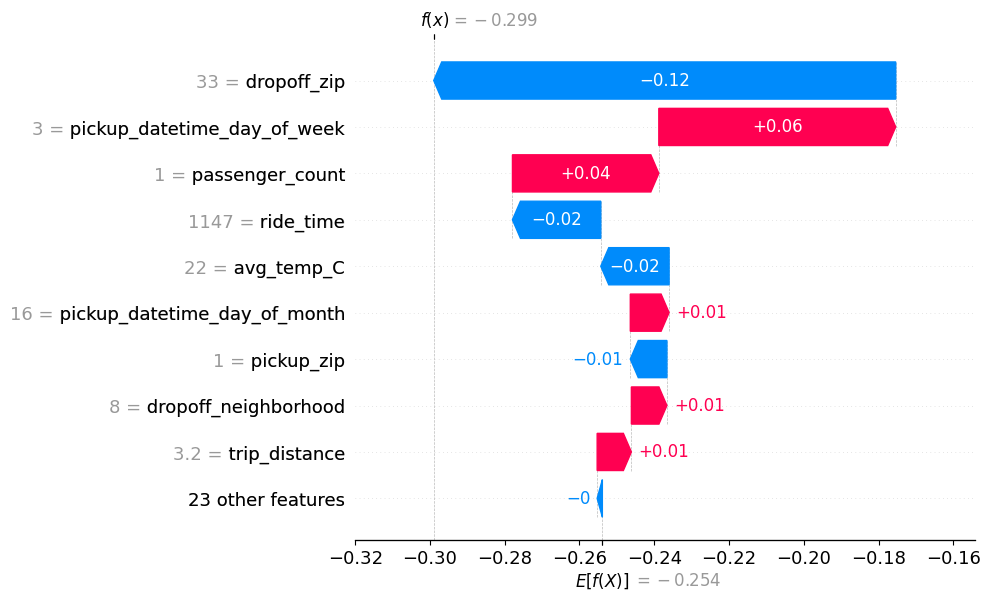

In [125]:
shap.plots.waterfall(shap_values[10])

Visualization of importance

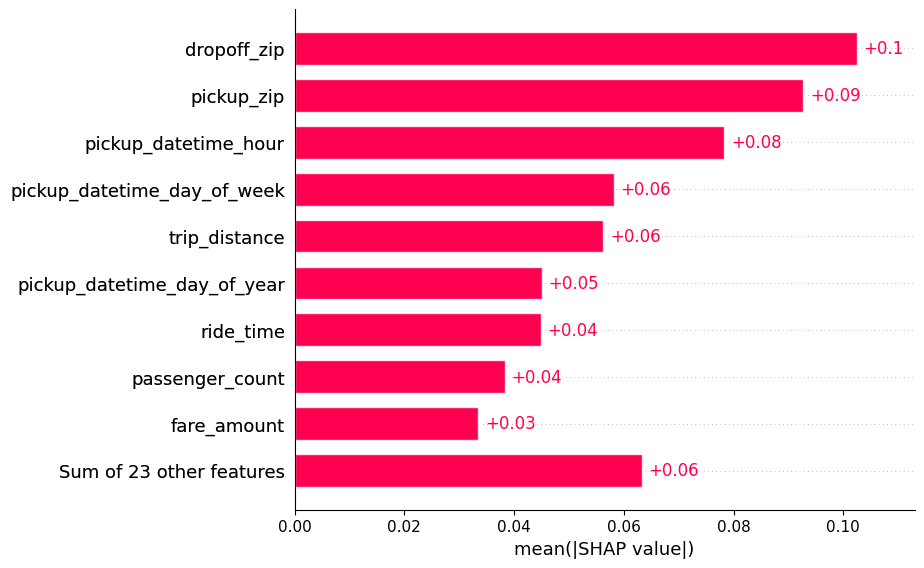

In [126]:

shap.plots.bar(shap_values)

## Results

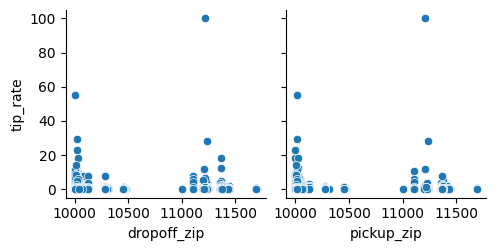

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, x_vars=['dropoff_zip', 'pickup_zip'], y_vars=['tip_rate'], kind='scatter')
plt.show()

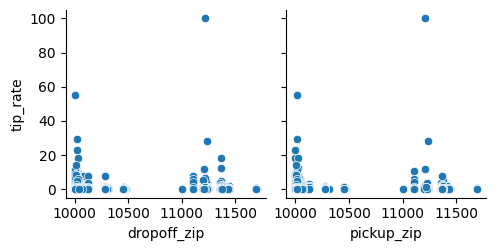

In [265]:
sns.pairplot(df, x_vars=['dropoff_zip', 'pickup_zip'], y_vars=['tip_rate'], kind='scatter')
plt.show()

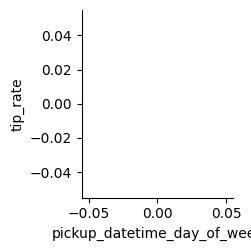

In [286]:
sns.pairplot(dft, x_vars=['pickup_datetime_day_of_week'], y_vars=['tip_rate'], kind='scatter')
plt.show()

In [290]:
dft['pickup_datetime_day_of_week'] = dft['pickup_datetime_day_of_week'].astype('category')

,pickup_datetime_day_of_week
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1199995,NaN
1199996,NaN
1199997,NaN
1199998,NaN


In [287]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 36 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   VendorID                       1200000 non-null  category
 1   passenger_count                1200000 non-null  int64   
 2   trip_distance                  1200000 non-null  float64 
 3   fare_amount                    1200000 non-null  float64 
 4   tip_amount                     1200000 non-null  float64 
 5   pickup_zip                     1200000 non-null  category
 6   pickup_borough                 1200000 non-null  category
 7   pickup_neighborhood            1200000 non-null  category
 8   dropoff_zip                    1200000 non-null  category
 9   dropoff_borough                1200000 non-null  category
 10  dropoff_neighborhood           1200000 non-null  category
 11  holiday_binary                 1200000 non-null  int64   
 12  

In [280]:
# prompt: average_tip_by_zip_sortedから`tip_rate`が0のものは除く

# Calculate the average tip rate for each pickup zip code
average_tip_by_zip = df.groupby('pickup_zip')['tip_rate'].mean()

# average_tip_by_zip_sortedからtip_rateが0のものは除く
average_tip_by_zip_sorted = average_tip_by_zip[average_tip_by_zip > 0.2]

# Sort the results in descending order
average_tip_by_zip_sorted = average_tip_by_zip_sorted.sort_values(ascending=False)

# Print the sorted results
print(average_tip_by_zip_sorted)



pickup_zip
11235    1.854421
11358    1.184444
11411    0.657857
11208    0.345828
11363    0.251556
10310    0.245000
11360    0.204951
11692    0.200150
Name: tip_rate, dtype: float64


In [279]:
# prompt: average_tip_by_zip_sortedから`tip_rate`が0のものは除く

# Calculate the average tip rate for each pickup zip code
average_tip_by_zip = df.groupby('pickup_zip')['tip_rate'].mean()

# average_tip_by_zip_sortedからtip_rateが0のものは除く
average_tip_by_zip_sorted = average_tip_by_zip[average_tip_by_zip > 0.2]

# Sort the results in descending order
average_tip_by_zip_sorted = average_tip_by_zip_sorted.sort_values(ascending=False)

# Print the sorted results
print(average_tip_by_zip_sorted)


pickup_zip
11235    1.854421
11358    1.184444
11411    0.657857
11208    0.345828
11363    0.251556
10310    0.245000
11360    0.204951
11692    0.200150
Name: tip_rate, dtype: float64


In [274]:
# prompt: データフレームの特定のカラムの値ごとの tip_rate の平均を計算して、tip_rateが０以外のものをすべて高い順に表示する関数の定義

def calculate_average_tip_rate(df, column_name):
  """
  データフレームの特定のカラムの値ごとの tip_rate の平均を計算して、
  tip_rateが０以外のものをすべて高い順に表示する関数

  Args:
    df: Pandas DataFrame.
    column_name: tip_rate を計算するカラムの名前.

  Returns:
    tip_rate が 0 以外のものを tip_rate の高い順に並べた Pandas Series.
  """
  # 特定のカラムの値ごとの tip_rate の平均を計算
  average_tip_by_column = df.groupby(column_name)['tip_rate'].mean()

  # tip_rate が 0 のものを除外
  average_tip_by_column_sorted = average_tip_by_column[average_tip_by_column != 0]

  # tip_rate の高い順にソート
  average_tip_by_column_sorted = average_tip_by_column_sorted.sort_values(ascending=False)
  print(average_tip_by_column_sorted)

In [281]:

calculate_average_tip_rate(df, 'dropoff_zip')

calculate_average_tip_rate(df, 'pickup_zip')

dropoff_zip
11235    0.245793
10307    0.242941
10312    0.219676
10306    0.177646
11697    0.174511
           ...   
11433    0.043367
10472    0.043133
11412    0.041900
11208    0.040360
10475    0.039763
Name: tip_rate, Length: 176, dtype: float64
pickup_zip
11235    1.854421
11358    1.184444
11411    0.657857
11208    0.345828
11363    0.251556
           ...   
10458    0.031954
10460    0.024924
10459    0.024004
10456    0.017205
11210    0.014014
Name: tip_rate, Length: 154, dtype: float64


In [283]:
# 使用例: pickup_zip の値ごとの tip_rate の平均を計算
calculate_average_tip_rate(dft, 'pickup_datetime_hour')

pickup_datetime_hour
21    0.143102
20    0.143003
22    0.142068
19    0.142012
8     0.140794
23    0.140423
18    0.139371
0     0.139088
1     0.136360
7     0.135926
2     0.135874
9     0.135016
3     0.134662
17    0.131691
6     0.127991
10    0.127463
16    0.127048
11    0.124257
12    0.123130
13    0.121959
14    0.120810
15    0.120766
5     0.120141
4     0.111515
Name: tip_rate, dtype: float64


In [284]:

calculate_average_tip_rate(dft, 'pickup_datetime_day_of_week')

Series([], Name: tip_rate, dtype: float64)


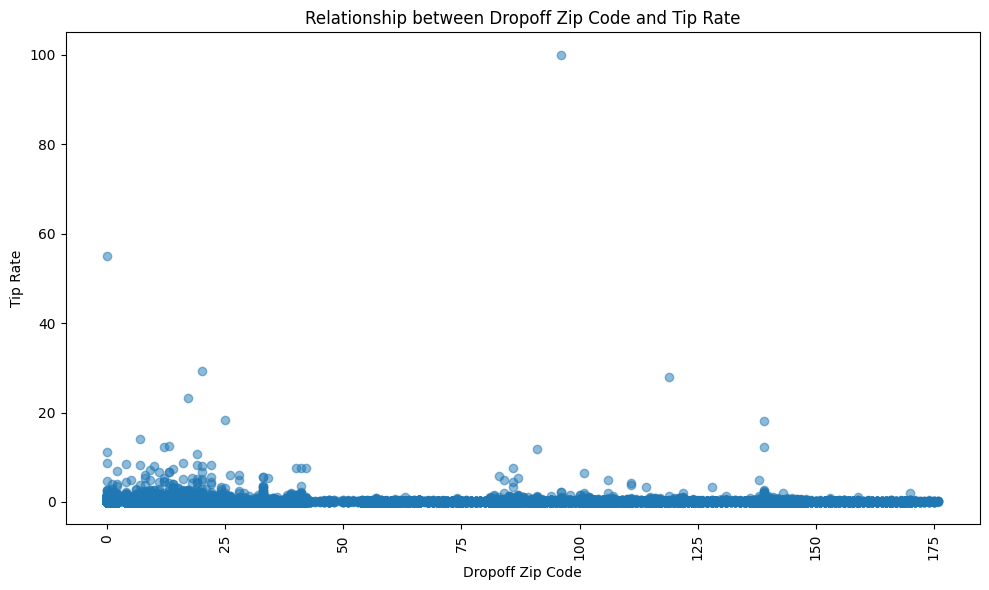

In [241]:
# prompt: dropoff_zipとtip_rateの関係をmatplotで描画して

import matplotlib.pyplot as plt
# 'dropoff_zip' を数値に変換
dft['dropoff_zip_num'] = dft['dropoff_zip'].cat.codes

# 'dropoff_zip' と 'tip_rate' の関係をプロット
plt.figure(figsize=(10, 6))
plt.scatter(dft['dropoff_zip_num'], dft['tip_rate'], alpha=0.5)
plt.xlabel('Dropoff Zip Code')
plt.ylabel('Tip Rate')
plt.title('Relationship between Dropoff Zip Code and Tip Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


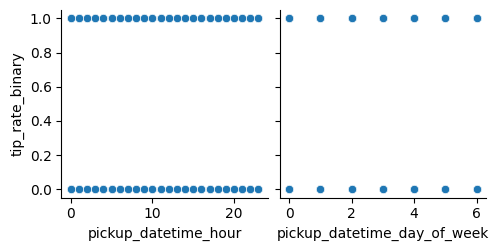

In [130]:

sns.pairplot(dft, x_vars=['pickup_datetime_hour', 'pickup_datetime_day_of_week'], y_vars=['tip_rate_binary'], kind='scatter')
plt.show()

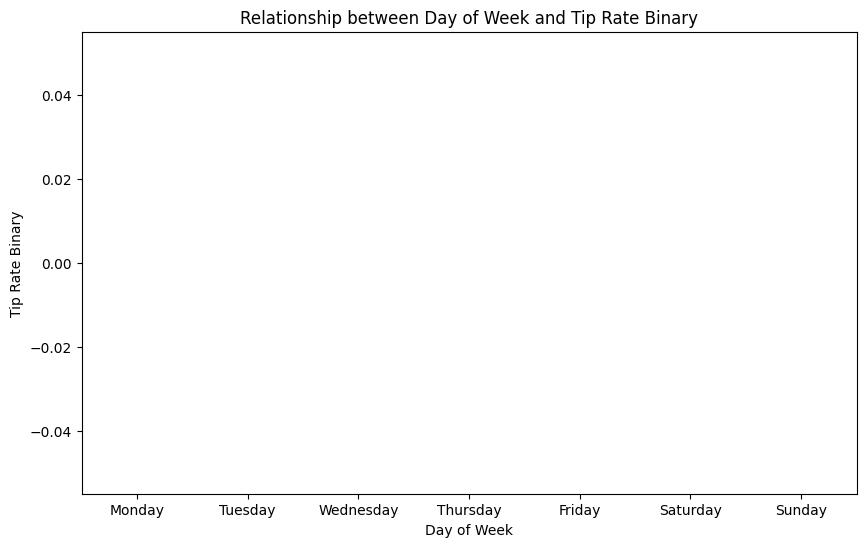

In [201]:
# prompt: 曜日とチップレートバイナリの関係をmatplotでボックスプロットとして描画してください

import pandas as pd
import matplotlib.pyplot as plt
# 'pickup_datetime_day_of_week' がカテゴリ変数として適切に設定されているか確認
dft['pickup_datetime_day_of_week'] = pd.Categorical(dft['pickup_datetime_day_of_week'],
                                                categories=['Monday', 'Tuesday', 'Wednesday',
                                                            'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                ordered=True)

# 曜日とチップレートバイナリの関係をボックスプロットで描画
plt.figure(figsize=(10, 6))
plt.boxplot([dft[dft['pickup_datetime_day_of_week'] == day]['tip_rate']
             for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Tip Rate Binary')
plt.title('Relationship between Day of Week and Tip Rate Binary')
plt.show()


In [206]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 36 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   VendorID                       1200000 non-null  category
 1   passenger_count                1200000 non-null  int64   
 2   trip_distance                  1200000 non-null  float64 
 3   fare_amount                    1200000 non-null  float64 
 4   tip_amount                     1200000 non-null  float64 
 5   pickup_zip                     1200000 non-null  category
 6   pickup_borough                 1200000 non-null  category
 7   pickup_neighborhood            1200000 non-null  category
 8   dropoff_zip                    1200000 non-null  category
 9   dropoff_borough                1200000 non-null  category
 10  dropoff_neighborhood           1200000 non-null  category
 11  holiday_binary                 1200000 non-null  int64   
 12  

## Outlier (WIP)

In [189]:
import pandas as pd
import numpy as np

def check_outliers_iqr(df, unique_threshold=10):
    """
    データフレーム内の数値型の列に対して、IQRを用いた外れ値検出を行う。
    数値型であってもユニークな値が少ない場合（カテゴリ変数として扱う場合）は除外する。

    Parameters:
    df (pd.DataFrame): 元のデータフレーム
    unique_threshold (int): ユニークな値の数がこのしきい値以下の場合はカテゴリ変数として扱う

    Returns:
    None
    """
    for col in df.columns:
        # 数値型の列のみを対象とし、ユニークな値の数がしきい値以上の列を処理
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_count = df[col].nunique()
            if unique_count > unique_threshold:
                # NaN値を除外して計算する
                col_data = df[col].dropna()
                if len(col_data) > 0:
                    Q1 = col_data.quantile(0.25)
                    Q3 = col_data.quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR

                    # 外れ値の検出
                    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
                    outlier_count = len(outliers)

                    if outlier_count > 0:
                        print(f"{col}: {outlier_count} outlier(s) found")
                        print(f"{col}:")
                        print(f"Lower bound: {lower_bound}")
                        print(f"Upper bound: {upper_bound}")
                    else:
                        print(f"{col}: No outlier found")
                    print("")
                else:
                    print(f"{col}: No data to calculate bounds")
                    print("")
            else:
                print(f"{col}: Treated as a categorical variable due to low unique values (nunique = {unique_count}), skipped")
                print("")
        else:
            print(f"{col}: Non-numeric column, skipped")
            print("")


A: Treated as a categorical variable due to low unique values (nunique = 6), skipped
B: Treated as a categorical variable due to low unique values (nunique = 6), skipped
C: Non-numeric column, skipped


TypeError: to_dict() takes from 1 to 2 positional arguments but 4 were given

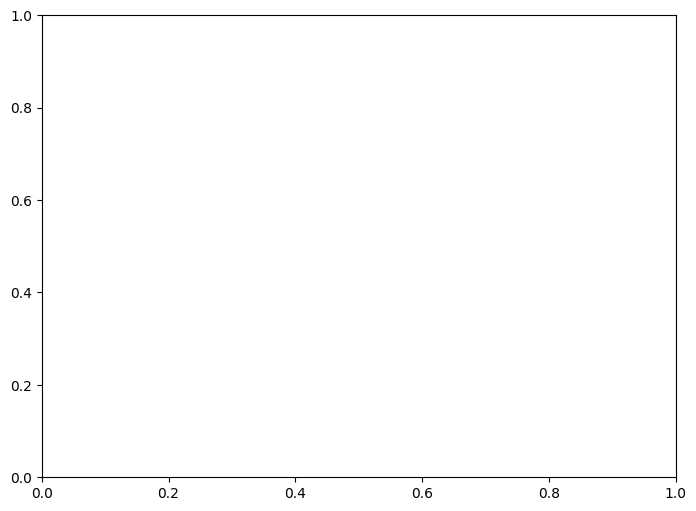

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, unique_threshold=10):
    df_clean = df.copy()  # 元のデータフレームのコピーを作成

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_count = df[col].nunique()
            if unique_count > unique_threshold:
                col_data = df[col].dropna()
                if len(col_data) > 0:
                    Q1 = col_data.quantile(0.25)
                    Q3 = col_data.quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR

                    condition = (df[col] >= lower_bound) & (df[col] <= upper_bound)

                    df_clean = df_clean[condition]
                else:
                    print(f"{col}: No data to calculate bounds")
            else:
                print(f"{col}: Treated as a categorical variable due to low unique values (nunique = {unique_count}), skipped")
        else:
            print(f"{col}: Non-numeric column, skipped")

    return df_clean

def visualize_outlier_removal(df, df_clean, cols_to_visualize=None):
    if cols_to_visualize is None:
        cols_to_visualize = df.select_dtypes(include=[np.number]).columns.tolist()

    # 外れ値除去前のデータ
    df_plot_original = pd.melt(df[cols_to_visualize], var_name='Feature', value_name='Value')
    df_plot_original['Type'] = 'Original'

    # 外れ値除去後のデータ
    df_plot_cleaned = pd.melt(df_clean[cols_to_visualize], var_name='Feature', value_name='Value')
    df_plot_cleaned['Type'] = 'Cleaned'

    # 両方のデータフレームを結合
    df_plot = pd.concat([df_plot_original, df_plot_cleaned])

    plt.figure(figsize=(18, 6))
    for col in cols_to_visualize:
        plt.subplot(1, len(cols_to_visualize), cols_to_visualize.index(col) + 1)
        sns.boxplot(x='Type', y='Value', data=df_plot[df_plot['Feature'] == col], palette={"Original": "blue", "Cleaned": "red"})
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# 使用例
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 100],  # 100は外れ値
    'B': [10, 20, 30, 40, 50, 200],  # 200は外れ値
    'C': ['a', 'b', 'b', 'a', 'c', 'd']  # カテゴリ変数
})

df_clean = remove_outliers_iqr(df)
visualize_outlier_removal(df, df_clean)


In [ ]:
# IQR法をすべてのカラムに適用して外れ値を除外する
def remove_outliers_iqr(df):
    new_df = df.copy()
    for col in new_df.columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 外れ値を除外
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df

In [ ]:
def visualize_outliers_iqr(df, title):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].boxplot(df.values, vert=False, patch_artist=True)
  axes[0].set_title(title)
  axes[0].set_yticklabels(df.columns)
  plt.tight_layout()
  plt.show()

In [ ]:
check_outliers_iqr(df_transf)
visualize_outliers_iqr(df_transf, 'Original Data')

In [ ]:
df_transf

In [ ]:
df_transf.info()

Calculate the entropy for each column of a data frame

In [ ]:
import pandas as pd
from scipy.stats import entropy

def calculate_entropy(series):
    value_counts = series.value_counts(normalize=True)
    return entropy(value_counts)

entropy_dict = {col: calculate_entropy(df_transf[col]) for col in df_transf.columns}

entropy_df = pd.DataFrame.from_dict(entropy_dict, orient='index', columns=['Entropy'])
print(entropy_df)


In [ ]:
# prompt: データフレームの各カラムの外れ値を検出して表示する

# 各カラムの外れ値を検出
outliers = {}
for col in dft.columns:
    # IQRを用いた外れ値検出
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = dft[(dft[col] < lower_bound) | (dft[col] > upper_bound)][col]

# 外れ値を表示
for col, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"カラム '{col}' の外れ値:")
        print(outlier_values)


In [ ]:
'''
import pandas as pd
import numpy as np
from scipy import stats

# Zスコアを使って外れ値を検出する関数
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < threshold).all(axis=1)]

# データフレームから外れ値を除外
df_no_outliers = remove_outliers_zscore(df)

# 結果を表示
print(df_no_outliers)
'''

In [149]:
# prompt: ピックアップ時間とチップレートの関係をmatplotで描画してください

import pandas as pd
import matplotlib.pyplot as plt
# 'pickup_datetime_hour' がカテゴリ変数として適切に設定されているか確認
dft['pickup_datetime_hour'] = pd.Categorical(dft['pickup_datetime_hour'],
                                                categories=range(24),
                                                ordered=True)

# 時間とチップレートの関係をボックスプロットで描画
plt.figure(figsize=(10, 6))
plt.boxplot([dft[dft['pickup_datetime_hour'] == hour]['tip_rate']
             for hour in range(24)],
            labels=range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Tip Rate')
plt.title('Relationship between Hour of Day and Tip Rate')
plt.show()


KeyError: 'pickup_datetime_hour'

In [137]:
# prompt: 'pickup_datetime_hour', 'pickup_datetime_day_of_week'について、オペレーション改善のために具体的にどの時間や曜日を注意すればよいか描画してください
# TypeError: to_dict() takes from 1 to 2 positional arguments but 4 were givenがでないようにしてください

import matplotlib.pyplot as plt
# 'pickup_datetime_hour'とtip_rate_binaryの関係
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_datetime_hour', y='tip_rate', data=dft, ci=None)
plt.title('Tip Rate by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Rate (Binary)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<ipython-input-137-a81aae6101c0>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pickup_datetime_hour', y='tip_rate', data=dft, ci=None)


TypeError: to_dict() takes from 1 to 2 positional arguments but 4 were given

<Figure size 1000x600 with 0 Axes>

In [136]:
# 'pickup_datetime_day_of_week'とtip_rate_binaryの関係
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_datetime_day_of_week', y='tip_rate', data=dft, ci=None)
plt.title('Tip Rate by Pickup Day of Week')
plt.xlabel('Pickup Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Tip Rate (Binary)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-136-789812e86efc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pickup_datetime_day_of_week', y='tip_rate', data=dft, ci=None)


TypeError: to_dict() takes from 1 to 2 positional arguments but 4 were given

<Figure size 1000x600 with 0 Axes>

In [128]:
# prompt: tip_rateが20%を超すレコードの件数とそれ以外のレコードの件数を表示してください

# tip_rateが20%を超すレコードの件数をカウント
num_over_20 = dft[dft['tip_rate'] > 0.2]['tip_rate'].count()

# tip_rateが20%以下のレコードの件数をカウント
num_under_20 = dft[dft['tip_rate'] <= 0.2]['tip_rate'].count()

# 結果を表示
print("tip_rateが20%を超すレコードの件数: ", num_over_20)
print("tip_rateが20%以下のレコードの件数: ", num_under_20)


tip_rateが20%を超すレコードの件数:  528085
tip_rateが20%以下のレコードの件数:  671915


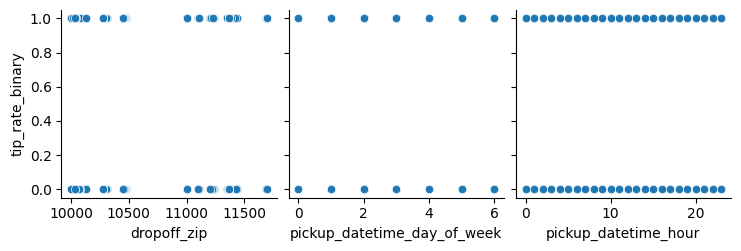

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(dft_filtered, x_vars=['dropoff_zip', 'pickup_datetime_day_of_week', 'pickup_datetime_hour'], y_vars=['tip_rate_binary'], kind='scatter')
plt.show()

In [124]:
# prompt: データフレームからtip_rateが50%以上のレコードを抽出してください

# tip_rateが50%以上のレコードを抽出
high_tip_rate_records = dft[dft['tip_rate'] >= 0.5]

# 結果を表示
high_tip_rate_records


,passenger_count,trip_distance,fare_amount,tip_amount,pickup_zip,dropoff_zip,holiday_binary,avg_temp_C,Rain,Fog,...,pickup_datetime_month_start,pickup_datetime_month_end,pickup_datetime_quarter_start,pickup_datetime_quarter_end,pickup_datetime_year_start,pickup_datetime_year_end,pickup_datetime_days_in_month,pickup_datetime_hour,ride_time,tip_rate
366,1,4.20,20.0,20.0,10007,11211,0,23,1,0,...,0,0,0,0,0,0,31,0,1765.0,1.000000
441,1,2.60,13.5,10.0,10028,10021,0,27,0,0,...,0,0,0,0,0,0,31,11,1092.0,0.740741
512,4,0.50,4.0,2.0,10002,10002,0,26,0,0,...,0,0,0,0,0,0,31,22,160.0,0.500000
789,1,1.70,11.0,8.0,10022,10023,0,20,0,0,...,0,0,0,0,0,0,31,20,928.0,0.727273
1272,1,0.60,5.0,10.0,11221,11221,0,18,1,0,...,0,0,0,0,0,0,31,14,253.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198542,2,4.70,18.0,10.0,10012,10044,0,28,0,0,...,0,0,0,0,0,0,31,23,1024.0,0.555556
1199098,1,1.00,8.0,5.0,10001,10036,0,1,0,0,...,0,0,0,0,0,0,31,13,618.0,0.625000
1199534,1,2.39,10.0,10.0,10128,10037,0,28,0,0,...,0,0,0,0,0,0,31,16,671.0,1.000000
1199753,1,3.30,15.0,15.0,10022,11106,0,26,0,0,...,0,0,0,0,0,0,31,16,1065.0,1.000000


In [ ]:
# prompt: タクシーのチップ率の計算式はどのようであるべきですか？

# タクシーのチップ率は、チップの金額を運賃の金額で割ったものとして計算されます。

# これは、データフレームに追加された「tip_rate」列の計算方法です。

dft['tip_rate'] = dft['tip_amount'] / dft['fare_amount']
print(dft)


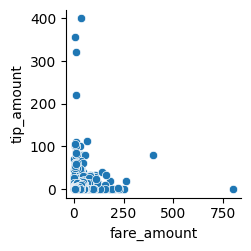

In [100]:

sns.pairplot(df_transf, x_vars=['fare_amount'], y_vars=['tip_amount'], kind='scatter')
plt.show()

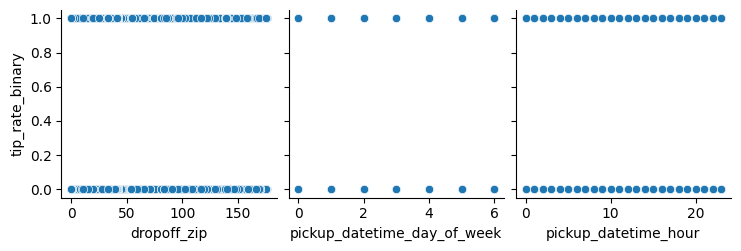

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(dft, x_vars=['dropoff_zip', 'pickup_datetime_day_of_week', 'pickup_datetime_hour'], y_vars=['tip_rate_binary'], kind='scatter')
plt.show()

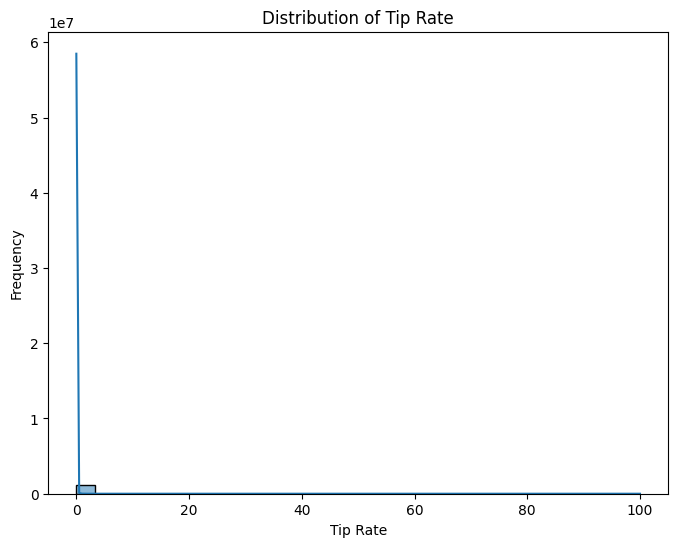

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


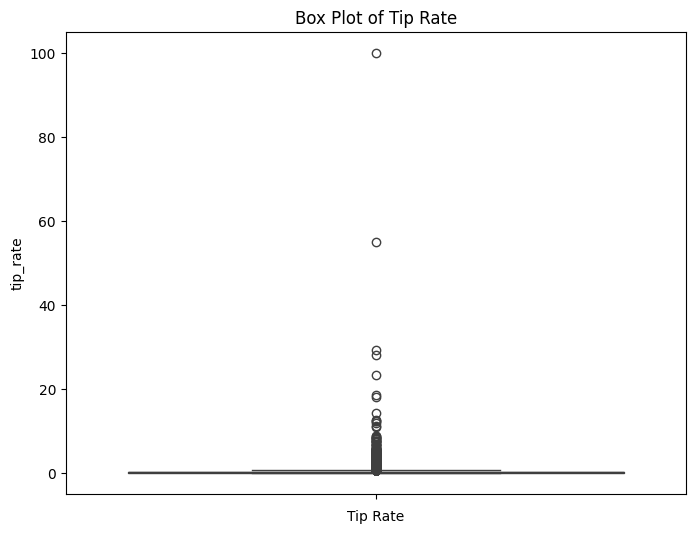

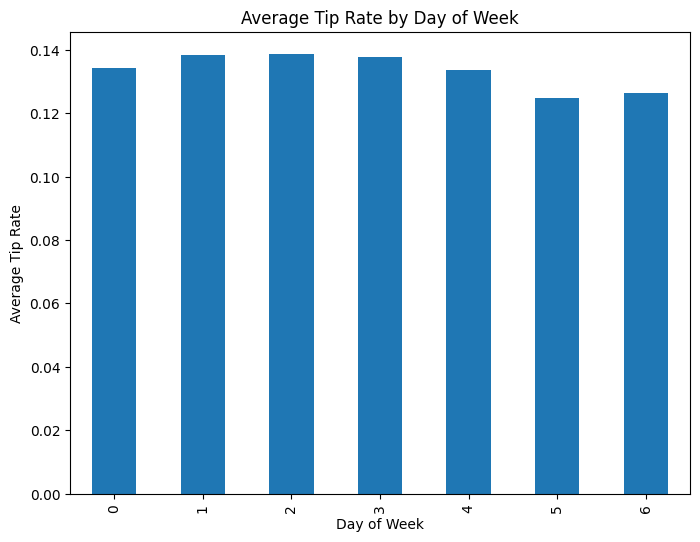

In [99]:
# prompt: tip_rateの内容を把握するために可視化してください。

import matplotlib.pyplot as plt
# tip_rateのヒストグラム
plt.figure(figsize=(8, 6))
sns.histplot(dft['tip_rate'], bins=30, kde=True)
plt.xlabel('Tip Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Rate')
plt.show()

# tip_rateの箱ひげ図
plt.figure(figsize=(8, 6))
sns.boxplot(dft['tip_rate'])
plt.xlabel('Tip Rate')
plt.title('Box Plot of Tip Rate')
plt.show()

# tip_rateと他の特徴量との関係を調べる
# 例：曜日ごとのtip_rateの平均値
plt.figure(figsize=(8, 6))
dft.groupby('pickup_datetime_day_of_week')['tip_rate'].mean().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Tip Rate')
plt.title('Average Tip Rate by Day of Week')
plt.show()


## Retry

In [101]:
# prompt: データフレームからtip_amountが200以上のレコードを抽出してください

### Code:
dft[dft['tip_amount'] >= 200]


,passenger_count,trip_distance,fare_amount,tip_amount,pickup_zip,dropoff_zip,holiday_binary,avg_temp_C,Rain,Fog,...,pickup_datetime_month_start,pickup_datetime_month_end,pickup_datetime_quarter_start,pickup_datetime_quarter_end,pickup_datetime_year_start,pickup_datetime_year_end,pickup_datetime_days_in_month,pickup_datetime_hour,ride_time,tip_rate
23775,1,7.50,37.0,400.00,11103,10022,0,26,0,0,...,0,0,0,0,0,0,31,3,3023.0,10.810811
359519,1,1.87,11.0,322.00,10021,10023,0,7,0,0,...,0,0,0,0,0,0,31,18,864.0,29.272727
547175,1,1.10,6.5,357.36,10017,10001,0,2,1,1,...,0,0,0,0,0,0,31,0,411.0,54.978462
968739,1,1.40,9.5,220.00,10002,10020,0,26,1,1,...,0,0,0,0,0,0,31,3,688.0,23.157895


In [103]:
# prompt: データフレームからtip_amountが200以上のレコードをのぞいた新しいデータフレームを作成してください

# データフレームからtip_amountが200以上のレコードをのぞいた新しいデータフレームを作成
dft_filtered = dft[dft['tip_amount'] < 200]
print(dft_filtered.shape)


(1199996, 29)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_train:', X_train.shape, ' y_train:', y_train.shape, ' X_test:', X_test.shape, ' y_test:', y_test.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df_transf, x_vars=['pickup_datetime_hour', 'dropoff_zip', 'pickup_datetime_day_of_week', 'pickup_zip'], y_vars=['tip_amount'], kind='scatter')
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold

params = {
    'objective': 'mae',
    'seed': 0,
    'verbose': -1,
}

valid_scores = []
models = []
oof = np.zeros(len(X_train))

Create a model by dividing the training data into 5 parts

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for fold, (tr_idx, va_idx) in enumerate(kf.split(X_train)):
    X_tr = X_train.iloc[tr_idx]
    X_va = X_train.iloc[va_idx]
    y_tr = y_train.iloc[tr_idx]
    y_va = y_train.iloc[va_idx]

    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_va, y_va, reference=lgb_train)

    model = lgb.train(params,
                      lgb_train,
                      num_boost_round=10000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.early_stopping(100),
                                 lgb.log_evaluation(500)])

    y_va_pred = model.predict(X_va, num_iteration=model.best_iteration)
    score = mean_absolute_error(y_va, y_va_pred)
    print(f'fold {fold+1} MAE valid: {score:.2f}')
    print('')

    valid_scores.append(score)
    models.append(model)
    oof[va_idx] = y_va_pred

cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score:.2f}')

Errors in validation data per fold

In [ ]:
valid_scores

Mean error of validation data

In [ ]:
print('MAE CV: %.2f' % (
      mean_absolute_error(y_train, oof)))

#### Evaluation of Cross Validation

## EDA (WIP)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, x_vars=['fare_amount', 'trip_distance', 'passenger_count'], y_vars=['tip_amount'], kind='scatter')
plt.show()


In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, x_vars=['fare_amount', 'trip_distance', 'passenger_count'], y_vars=['tip_amount'], kind='scatter')
plt.show()


In [ ]:
sns.pairplot(df, x_vars=['payment_type'], y_vars=['tip_amount'], kind='scatter')
plt.show()


In [ ]:
# prompt: dfデータフレームの中でのpayment_typeの値の分散を視覚化してください。

import matplotlib.pyplot as plt
# payment_typeの値の分散を視覚化
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 棒グラフを作成
plt.figure(figsize=(8, 6))
#payment_tip_mean.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
dfデータフレームの中でのpayment_typeのぶんさんのtip_amountの分布を描画してください。

In [ ]:
# prompt: dfデータフレームを使って、payment_typeとtip_amountの関係を描画してください。

import matplotlib.pyplot as plt
# 支払方法別のチップ額の分布を可視化
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='tip_amount', data=dft)
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.title('Tip Amount Distribution by Payment Type')
plt.xticks(rotation=45)
plt.show()
